# Linear Algebra - Part 1
In this section you will  
* have a short review over numpy syntax for defining vectors, matrices, and tensors.
* see few examples about performing mathematical operations in numpy.
* learn how arrays are stuctrured in numpy and how indexing works.
* learn how to define a coordinate system and get  familiar with the common array initialization functions in Python.
* walk through some examples about simulating a vector field.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Vectors, Matrices
Defining vectors in numpy

In [ ]:
# zeros, ones
a = np.zeros((10), dtype="float64")
a = np.zeros((10), dtype=np.float32)
b = np.ones((550), dtype="int32")
c = np.zeros_like(b)

In [ ]:
# linspace
a = np.linspace(0, 10.1, 100)
b = np.linspace(20, -5, 256)

In [ ]:
# arange
a = np.arange(0, 10, 0.1)
b = np.arange(-5, 200, 10.2)
c = np.arange(0, 10, 1)

In [ ]:
# interpolation by linsapce
c = np.linspace(np.array([0.0, 1.0, 2.0, 3.0]), np.array([3.0, 2.0, 1.0, 0.0]), 50)

plt.imshow(c)
plt.show()

### Indexing

In [ ]:
c = np.linspace(np.array([0.0, 1.0, 2.0, 3.0]), np.array([3.0, 2.0, 1.0, 0.0]), 5)

print(c[1, -1])

In [ ]:
print(c[0])
print(c[0, :])

In [ ]:
print(c[-1])

In [ ]:
print(c[:, 3])

In [ ]:
print(c[2:5, 1:3])

In [ ]:
print(c[1:4, ::2])

In [ ]:
print(c[1:, ::2])

### Indexing in multiple dimensional

In [ ]:
a = np.zeros((10, 7, 3))
for i in range(a.shape[2]):
    a[..., i] = i*np.ones((a.shape[0], a.shape[1]))

plt.imshow(a[..., 2], vmin=0, vmax=5, cmap='gray')
plt.show()
plt.imshow(a[0, ...])
plt.show()

plt.imshow(a[:, 4, :])
plt.show()

## Coordinate systems

In [ ]:
# Meshgrid and coordinates
# in 2D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

plt.imshow(x)
plt.show()
plt.imshow(y)
plt.show()

# in 3D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.linspace(0, 5, 10)
x, y, z = np.meshgrid(x, y, z)

In [ ]:
# We can simply apply a function on coordinates and numerically simulate its distribution through the coordinate system. 
# The system can represent space, time, frequency or any parameter.

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

f = y*x
plt.imshow(f)
plt.show()

r = np.sqrt(x*x + y*y)
plt.imshow(r)
plt.show()


f = np.sin(r)
plt.imshow(f)
plt.show()

In [ ]:
# Defining arrays of vectors
# We can compute an array of vectors known as vector field 

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
x, y = np.meshgrid(x, y)

u = np.sin(x)
v = np.cos(y)
plt.quiver(x, y, u, v)
plt.show()

u = -np.sin(y)
v = np.cos(x)
plt.quiver(x, y, u, v)
plt.show()

## Multiplication

### Dot product

In [ ]:
a = np.array([2.1, -7.5, 5.0])
b = np.array([0.2, 2.8, -1.6])

dot = np.dot(a, b)
print(dot)
print(np.sum(a*b))

In [ ]:
# Dot product between vectors

x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

u1 = -y
v1 = x

u2 = x
v2 = y

plt.quiver(x, y, u1, v1)
plt.show()

plt.quiver(x, y, u2, v2)
plt.show()

dot = u1*u2 + v1*v2
plt.imshow(dot)
plt.show()


### Cross product

In [ ]:
# Between arrays of vectors

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
x, y = np.meshgrid(x, y)

u1 = -y
v1 = x

u2 = x
v2 = y

plt.quiver(x, y, u1, v1)
plt.show()

plt.quiver(x, y, u2, v2)
plt.show()

# Cross product must be solved in 3D but we are only working in 2D (x, y)
# We are sure that the cross product only has component in the z direction

# since the relation is 
# 𝒂×𝒃=(𝑎2*𝑏3 − 𝑎3*𝑏2)𝑖 + (𝑎3*𝑏1 − 𝑎1*𝑏3)𝑗 + (𝑎1*𝑏2 − 𝑎2*𝑏1)𝑘
# a3 = b3 = 0
# => 𝒂×𝒃 = (𝑎1*𝑏2 − 𝑎2*𝑏1)𝑘

cross = u1*v2 - u2*v1
# now we can show it as scalar values in an image
plt.imshow(np.abs(cross))
plt.show()

## 3D vector field example

In [ ]:
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.1),
                      np.arange(-0.8, 1, 0.1),
                      np.arange(-0.8, 1, 0.3))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.3, color='black')
plt.show()

## Electric field simulation

In [ ]:
# 2d vector example
# electric field
x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
x, y = np.meshgrid(x, y)

def E_field(q, x0, y0, x, y):
    x_ = x - x0
    y_ = y - y0
    r = np.sqrt(x_*x_ + y_*y_)
    return np.stack([q*x_/np.power(r, 3), q*y_/np.power(r, 3)], axis=0)

E = E_field(1.0, 3, -5, x, y)
Ex = E[0]
Ey = E[1]
plt.quiver(x, y, Ex, Ey)
plt.show()

In [ ]:
# Adding multiple vector fields

E = E_field(1.0, 3, -5, x, y) + E_field(-0.7, -2, 6, x, y) + E_field(-0.3, -7, -2, x, y)
Ex = E[0]
Ey = E[1]
E_m = np.sqrt(Ex*Ex + Ey*Ey)


fig = plt.figure()
ax = fig.add_subplot(111)
color = 2 * np.log(E_m)
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.0)
plt.show()


plt.imshow(Ex[::-1, :])
plt.show()
plt.imshow(Ey[::-1, :])
plt.show()

# why did we ignore k in E-field formula
# how to handle singularity

# Linear Algebra - Part 2

In [ ]:
# Initializing the coordinate system
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
x, y, z = np.meshgrid(x, y, z)


def show_points(u, v, w, xlim=None, ylim=None, zlim=None, rx=30, ry=30, rz=0):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    if zlim is not None:
        ax.set_zlim(zlim[0], zlim[1])
    ax.scatter(u,v,w)
    ax.scatter(0,0,0)
    ax.view_init(rx, ry, rz)
    plt.show()

show_points(x, y, z, (-10, 10), (-10, 10), (-10, 10))

## Transforms
#### Scale

In [ ]:
# Scale

def S(x, y, z, sx=1, sy=1, sz=1):
    return sx*x, sy*y, sz*z

u, v, w = S(x, y, z, 2, 0.5, 1)
show_points(u, v, w, (-10, 10), (-10, 10), (-10, 10))
u, v, w = S(x, y, z, -0.7, 0.5, 1.5)
show_points(u, v, w, (-10, 10), (-10, 10), (-10, 10))

#### Rotation

In [ ]:
# Rotation

#       [1     0     0]
# Rx =  [0  cos0 -sin0]
#       [0  sin0  cos0]
def Rx(x, y, z, theta):
    rad = theta * np.pi/180
    return x, np.cos(rad)*y - np.sin(rad)*z, np.sin(rad)*y + np.cos(rad)*z

#       [cos0  0 -sin0]
# Ry =  [0     1     0]
#       [sin0  0  cos0]
def Ry(x, y, z, theta):
    rad = theta * np.pi/180
    return np.cos(rad)*x - np.sin(rad)*z, y, np.sin(rad)*x + np.cos(rad)*z

#       [cos0 -sin0  0]
# Rz =  [sin0  cos0  0]
#       [0        0  1]
def Rz(x, y, z, theta):
    rad = theta * np.pi/180
    return np.cos(rad)*x - np.sin(rad)*y, np.sin(rad)*x + np.cos(rad)*y, z


In [ ]:
# Apply Rotation

u, v, w = Rx(x, y, z, 45)
show_points(u, v, w, (-8, 8), (-8, 8), (-8, 8))

u, v, w = Ry(x, y, z, 45)
show_points(u, v, w, (-8, 8), (-8, 8), (-8, 8))

u, v, w = Rz(x, y, z, 45)
show_points(u, v, w, (-8, 8), (-8, 8), (-8, 8))

In [ ]:
# For all axes

u, v, w = Rz(x, y, z, 10)
u, v, w = Ry(u, v, w, 30)
u, v, w = Rz(u, v, w, -45)

show_points(u, v, w, (-8, 8), (-8, 8), (-8, 8))

#### General form of transformation

In [ ]:
def GeneralTransform(x, y, z, H):
    return x*H[0, 0] + y*H[0, 1] + H[0, 2]*z, x*H[1, 0] + y*H[1, 1] + H[1, 2]*z, x*H[2, 0] + y*H[2, 1] + H[2, 2]*z

h = np.array([[0,       2,    0.5],
              [-2,     -1,    0.1],
              [0.03, -0.3,    0.3]])

u, v, w = GeneralTransform(x, y, z, h)
show_points(u, v, w, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10))

In [ ]:
# random transform

t = np.random.rand(3, 3)
t -= 0.5
t *= 2

u, v, w = Transform(x, y, z, t)
show_points(u, v, w, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10))

## N-dimensional transform

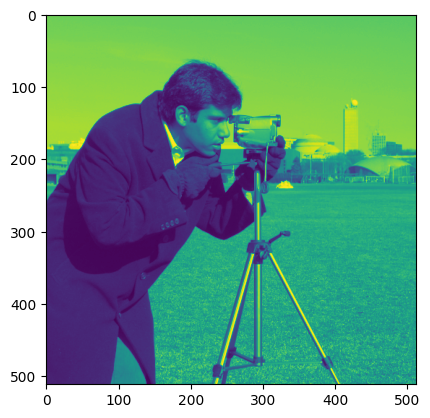

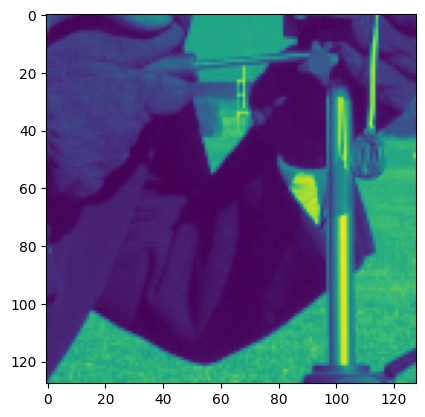

In [2]:
from skimage.data import camera

camera_man = camera()
plt.imshow(camera_man)
plt.show()

nx, ny = 128, 128
camera_man = camera_man[255-ny//2:255+ny//2, 255-nx//2:255+nx//2]
plt.imshow(camera_man)
plt.show()

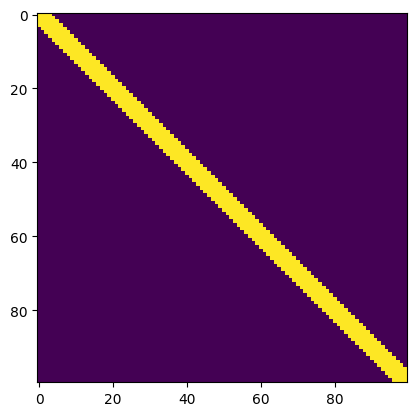

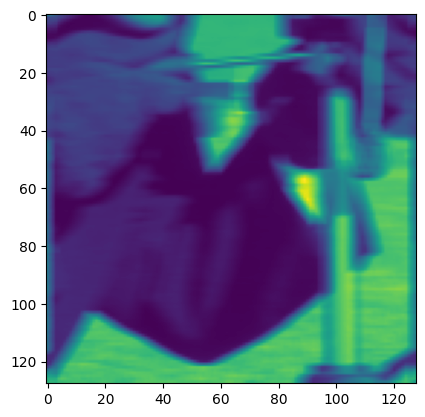

In [3]:
camera_man_raveled = camera_man.ravel()

H = np.zeros((nx*ny, nx*ny), dtype=np.float32)
np.fill_diagonal(H, 1)
H += np.roll(H, 1, axis=0) + np.roll(H, 2, axis=0) + np.roll(H, 3, axis=0) + np.roll(H, -1, axis=0) + np.roll(H, -2, axis=0) + np.roll(H, -3, axis=0)

camera_man_transformed = np.matmul(H, camera_man_raveled)
camera_man_transformed = camera_man_transformed.reshape(ny, nx)

plt.imshow(H[:100, :100])
plt.show()
plt.imshow(camera_man_transformed)
plt.show()

## Affine transformation

#### Translation

In [ ]:
# Affine transformation: translation

def AffineTransform(x, y, z, H):
    wc = x*H[3, 0] + y*H[3, 1] + z*H[3, 2] + H[3, 3]
    return (x*H[0, 0] + y*H[0, 1] + z*H[0, 2] + H[0, 3])/wc, (x*H[1, 0] + y*H[1, 1] + z*H[1, 2] + H[1, 3])/wc, (x*H[2, 0] + y*H[2, 1] + z*H[2, 2] + H[2, 3])/wc


def translate(x, y, z, tx, ty, tz)
    return AffineTransform(x, y, z, )

h = np.array([[1,       0,      0,      5], 
              [0,       1,      0,      0],
              [0,       0,      1,      2],
              [0,       0,      0,      1]])


x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
x, y, z = np.meshgrid(x, y, z)

show_points(x, y, z, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10))


u, v, w = AffineTransform(x, y, z, h)
show_points(u, v, w, xlim=(-10, 10), ylim=(-10, 10), zlim=(-10, 10))

#### Perspective (experimental)

In [ ]:
def AffineTransform(x, y, z, H):
    wc = x*H[3, 0] + y*H[3, 1] + z*H[3, 2] + H[3, 3]
    return (x*H[0, 0] + y*H[0, 1] + z*H[0, 2] + H[0, 3])/wc, (x*H[1, 0] + y*H[1, 1] + z*H[1, 2] + H[1, 3])/wc, (x*H[2, 0] + y*H[2, 1] + z*H[2, 2] + H[2, 3])/wc



x = np.linspace(1, 3, 5)
y = np.linspace(1, 3, 5)
z = np.linspace(1, 3, 5)
x, y, z = np.meshgrid(x, y, z)

show_points(x, y, z, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))



h = np.array([[1,       0,      0,      0], 
              [0,       1,      0,      0],
              [0,       0,      1,      0],
              [0,       0,      1,      0]])

u, v, w = AffineTransform(x, y, z, h)
show_points(u, v, w, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))

In [ ]:
def perspective_array(far_plane, near_plane, fov):
    S = 1/np.tan(fov* np.pi/360)
    return np.array([[S,       0,      0,      0], 
                     [0,       S,      0,      0],
                     [0,       0,    (near_plane+far_plane)/(near_plane-far_plane),      -2*far_plane*near_plane/(near_plane-far_plane)],
                     [0,       0, 1,      0]])

show_points(x, y, z, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5), rx=0, ry=0, rz=0)

h = perspective_array(far_plane=10, near_plane=1, fov=90)
u, v, w = AffineTransform(x, y, z, h)
show_points(u, v, w, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5), rx=0, ry=0, rz=0)